In [112]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
base = '/Users/maxv/Dropbox (MIT)/inferring_expectations/'

def name_stub(name):
    """
    Removes number at end of a PGE circuit name string 
    """
    return ''.join(re.split(r'[0-9,.*]*$', name)[:-1])
print(name_stub('ORO FINO 60KV TAP'))
print(name_stub('FITCH MOUNTAIN-11132'))
print(name_stub('COAST RD-0401*'))

ORO FINO 60KV TAP
FITCH MOUNTAIN-
COAST RD-


In [115]:
gdb = gpd.read_file(base + 'data/ica_maps/ICADisplay.gdb')
gdb = gdb.to_crs(epsg=2163)
print(gdb.shape)
gdb.head()

(1193735, 12)


,FeederId,FeederName,Globalid,CSV_LineSection,ICA_Analysis_Date,LoadCapacity_kW,GenCapacity_kW,GenericPVCapacity_kW,GenCapacity_no_OpFlex_kW,GenericCapacity_no_OpFlex_kW,Shape_Length,geometry
0,022801109,LARKIN (Y) 1109,{44EC77A6-2FCD-47B5-AB80-C94548D01F2A},4332486,Sep 2021,990,1420,2340,1420,2340,91.372239,"MULTILINESTRING ((-1944690.164 -537542.046, -1..."
1,022101102,SF H 1102,{399BB2A1-D5AB-4CFE-AC85-994983E729DD},3416465,Mar 2020,640,350,460,2450,3750,12.969801,"MULTILINESTRING ((-1948910.517 -541206.201, -1..."
2,022101102,SF H 1102,{39C65BD8-96DE-4154-A800-1228FE605718},4963220,Mar 2020,640,350,460,2460,3760,321.192733,"MULTILINESTRING ((-1949207.080 -541025.253, -1..."
3,022801109,LARKIN (Y) 1109,{2CB496D9-50B9-4F3C-B714-F54E37416338},3074862,Sep 2021,990,1690,2340,1690,2340,56.434891,"MULTILINESTRING ((-1944690.164 -537542.046, -1..."
4,083392111,SWIFT 2111,{5150E29C-AC03-442D-9572-B48344F9F329},3061326,May 2021,7450,670,1020,10000,10000,61.541487,"MULTILINESTRING ((-1906798.484 -602958.762, -1..."


<AxesSubplot:>

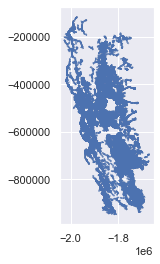

In [116]:
gdb.plot()

In [6]:
pd.unique(gdb.ICA_Analysis_Date)

array(['Sep 2021', 'Mar 2020', 'May 2021', 'Jun 2021', 'Aug 2021',
       'Oct 2020', 'Nov 2020', 'Mar 2021', 'Feb 2021', 'Dec 2020',
       'Jan 2021', 'Apr 2021', 'Sep 2020', 'Jul 2021', 'Apr 2020',
       'Feb 2020', 'Jul 2020', 'Aug 2020', 'Oct 2019', 'May 2020',
       'Nov 2019', 'Jan 2020', 'Jun 2020', 'Dec 2019', None, 'Dec 2018'],
      dtype=object)

In [108]:
# feeder_geo = gdb[['FeederId','FeederName','geometry']].dissolve(by='FeederName')
feeder_no_num = feeder_geo.copy().reset_index()
feeder_no_num['FeederName'] = feeder_no_num['FeederName'].apply(name_stub)
feeder_no_num = feeder_no_num.dissolve(by='FeederName')

In [114]:
feeder_no_num.shape

(725, 2)

In [10]:
len(pd.unique(gdb[gdb.ICA_Analysis_Date == 'Dec 2020'].FeederName))

112

In [3]:
import pandas as pd
psps = pd.read_csv(base + 'data/PSPS_event_data.csv',header=1)
psps.dropna(axis=1,how='all').head()

,Utility,Outage Start,Full Restoration,Outage Duration,Outage Days,Outage Hours,Circuit Name,HFTD,TOTAL CUSTOMERS IMPACTED,RESIDENTIAL CUSTOMERS,COMMERCIAL/INDUSTRIAL CUSTOMERS,MEDICAL BASELINE CUSTOMERS,OTHER CUSTOMERS,Notes,Unnamed: 15
0,SDG&E,10/5/13 6:02,10/5/13 14:55,"0 days,8 hrs,53 min",0.370,8.88,79,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
1,SDG&E,10/5/13 6:05,10/5/13 14:41,"0 days,8 hrs,36 min",0.358,8.60,TL 626 - CIRCUIT 238,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
2,SDG&E,10/6/13 2:03,10/6/13 8:10,"0 days,6 hrs,7 min",0.255,6.12,79,NaN,83,NaN,NaN,NaN,NaN,NaN,NaN
3,SDG&E,10/6/13 2:10,10/6/13 8:10,"0 days,6 hrs,0 min",0.250,6.00,79,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN
4,SDG&E,10/6/13 2:13,10/6/13 7:44,"0 days,5 hrs,31 min",0.230,5.52,TL 626 - CIRCUIT 238,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
import numpy as np
import re
psps_names = pd.unique(psps[(psps.Utility.isin(['PGE','PG&E']))]['Circuit Name'])
def clean_name(name):
    if str(name)[-2:] == '*3': name = name.split('*3')[0]
    name = str(name).lower().strip()
    name = name.replace('-',' ')
    name = name.replace('–',' ')
    name = name.replace('*',' ')
    name = name.replace('  ',' ')
    name = name.replace('  ',' ')
    name = re.split(r'\[[0-9,.]\]',name)[0].strip()
    name = name.strip()
    return name
transmission_names = psps[(psps.Utility.isin(['PGE','PG&E'])) & (psps.Notes == 'Transmission') ]['Circuit Name']
transmission_names = pd.unique([clean_name(name) for name in transmission_names])
circuit_names = pd.unique([clean_name(name) for name in feeder_geo.reset_index()['FeederName']])
circuit_no_num_names = pd.unique([clean_name(name) for name in feeder_no_num.reset_index()['FeederName']])
new_names = []

def in_transmission(name, transmission_names):
    name = clean_name(name)
    if name in transmission_names:
        return True
    if re.split(r'\([0-9,. ]+kv\)',name)[0].strip() in transmission_names:
        return True
    if 'tiger creek' in name:
        return True
    if name.replace('(','').replace(')','').strip() in transmission_names:
        return True
    if 'west point valley spring (60 kv)' == name: 
        name = 'west point valley springs 60 kv'
        return name in transmission_names
    if name [-4:] == 'line':
        new_name = name.split('line')[0].strip()
        if new_name in transmission_names: return new_name
    if '60kv tap' in name:
        new_name = name.replace('60kv tap','tap 60kv')
        if new_name in transmission_names: return new_name
    return False

def translate_name(name, circuit_names):
    """
    Looks for a match to a name from PSPS circuit names
    to the PGE circuit map names
    Returns the match name, if found, or None if not 
    """
    name = clean_name(name)
#     name = name.replace('\xa0',' ')
    if name in circuit_names: return name
    if 'big bend1102' == name: 
        new_name = 'big bend 1102'
        if new_name in circuit_names: return new_name
    if 'wyandotte1110' == name:
        new_name = 'wyandotte 1110'
        if new_name in circuit_names: return new_name
    if 'san joaquin power house no 2' in name:
        new_name = name.replace('san joaquin power house no 2','san joaquin #2')
        if new_name in circuit_names: return new_name
    if ('san joaquin' in name) and ('ph 11' in name):
        new_name = name.replace('ph 11','11')
        if new_name in circuit_names: return new_name
    if name [-4:] == 'line':
        new_name = name.split('line')[0].strip()
        if new_name in circuit_names: return new_name
    if name[-2:] == 'kv':
        new_name = re.split(r'[0-9,.]+kv',name)[0].strip()
        if new_name in circuit_names: return new_name
    if 'peoria flat' in name:
        new_name = name.replace('peoria flat', 'peoria')
        if new_name in circuit_names: return new_name
    if 'sycamore reek' in name:
        new_name = name.replace('reek', 'creek')
        if new_name in circuit_names: return new_name
    if 'san leandro' in name:
        new_name = name.replace('san leandro', 'san leandro u')
        if new_name in circuit_names: return new_name
    if 'vallejo sta c' in name:
        new_name = name.replace('vallejo sta c', 'vallejo c')
        if new_name in circuit_names: return new_name
    return None
not_found = 0
for name in psps_names:
    new_name = translate_name(name, circuit_names)
    if new_name is None:
        new_name = translate_name(name_stub(clean_name(name)), circuit_no_num_names)
        if new_name is not None: 
            print('{} -> {}'.format(name, new_name))
            continue
        if in_transmission(name, transmission_names):
#             print('{} is a transmission line'.format(name))
            continue
        print('-'*10 + 'not found: ' + name)
        not_found += 1
#     elif new_name != name.lower().strip():
#         print(name, '->', new_name)
print(not_found / len(psps_names))
# Note: 5 locations were not matched; these correspond to 5 total customers impacted

----------not found: PIT NO 7-1101 
FLINT-1102  -> flint
CASTRO VALLEY-1106  -> castro valley
----------not found: BRYANT-0401 
----------not found: PIT NO 7-1101
FLINT-1102 -> flint
FITCH MOUNTAIN-11132 -> fitch mountain
CASTRO VALLEY-1101* -> castro valley
----------not found: COAST RD-0401*
CASTRO VALLEY-1106* -> castro valley
----------not found: RUSS RANCH-1101*
----------not found: BRYANT-0402
----------not found: BRYANT-0401
SOLEDAD-1114 -> soledad
CAMPHORA-0401 -> camphora
ARBUCKLE-1103 -> arbuckle
----------not found: SO. CAL EDISON NO. 3-1101
----------not found: PIT NO 7 1101
----------not found: BRYANT 0402
----------not found: BRYANT 0401
----------not found: SCE TEHACHAPI 1101
----------not found: SO. CAL. EDISON #3 110
0.006416584402764067


In [25]:
with open(base + 'data/pge_names.txt', 'w+') as outfile:
    for name in circuit_names:
        outfile.write(name + '\n')

In [34]:
with open(base + 'data/transmission_names.txt', 'w+') as outfile:
    for name in transmission_names:
        outfile.write(name + '\n')

In [38]:
thing = clean_name('FULTON-CALISTOGA (60 kV)')
thing

'fulton calistoga (60 kv)'

In [91]:
name_stub('ORO FINO 60KV TAP')

''

In [73]:
[''.join(re.split(r' [0-9,.*]', name)[:-1]) for name in circuit_names]

['18th street',
 '18th street',
 '21st avenue',
 '21st avenue',
 '21st avenue',
 '6th avenue',
 '6th avenue',
 '6th avenue',
 '7th standard',
 '7th standard',
 '7th standard',
 '8th avenue',
 'acton',
 'acton',
 'airways',
 'airways',
 'airways',
 'airways',
 'airways',
 'airways',
 'airways',
 'alhambra',
 'alhambra',
 'alhambra',
 'alleghany',
 'alleghany',
 'almaden',
 'almaden',
 'almaden',
 'almaden',
 'alpaugh',
 'alpaugh',
 'alpaugh',
 'alpine',
 'alpine',
 'alto',
 'alto',
 'alto',
 'alto',
 'alto',
 'alto',
 'ames',
 'ames',
 'anderson',
 'anderson',
 'anderson',
 'angiola',
 'angiola',
 'angiola',
 'anita',
 'anita',
 'anita',
 'anita',
 'annapolis',
 'antelope',
 'antelope',
 'antler',
 'apple hill',
 'apple hill',
 'apple hill',
 'arana',
 'arana',
 'arbuckle',
 'arbuckle',
 'arbuckle',
 'arcata',
 'arcata',
 'arcata',
 'arcata',
 'arcata',
 'arlington',
 'arvin',
 'arvin',
 'arvin',
 'ashlan ave',
 'ashlan ave',
 'ashlan ave',
 'ashlan ave',
 'ashlan ave',
 'ashlan ave',
 

In [107]:
feeder_geo.reset_index()['FeederName'].apply(name_stub)

0       18TH STREET 
1       18TH STREET 
2       21ST AVENUE 
3       21ST AVENUE 
4       21ST AVENUE 
            ...     
2960           ZACA 
2961           ZACA 
2962         ZAMORA 
2963         ZAMORA 
2964         ZAMORA 
Name: FeederName, Length: 2965, dtype: object